# --MEMPREDIKSI LOKASI YEAST (RAGI) BERDASARKAN PROTEIN--

# 1. Pendahuluan

## 1.1 Apa itu Yeast

Yeast atau dalam bahasa indonesia Ragi merupakan mikroorganisme bersel satu yang termasuk dalam kerajaan fungi. Ragi dapat menyebabkan fermentasi. Ragi sendiri biasanya sering digunakan dalam dunia industri makanan dan minuman hasil fermentasi seperti acar, tempe, tape, roti dlsbnya. didalam ragi sendiri mengandung Nutritional yeast, biasanya sebagai suplemen makanan yang mengandung berbagai nutrisi penting seperti protein, vitamin B, dan mineral. Ini sering digunakan oleh vegetarian dan vegan sebagai sumber vitamin B12. Selain digunakan dalam industri makanan dan minuman, yeast juga digunakan dalam bioteknologi dan penelitian ilmiah. Misalnya, yeast sering digunakan sebagai model organisme dalam penelitian genetika dan biologi sel karena siklus hidupnya yang cepat dan genom yang sederhana. Mikroorganisme yang digunakan di dalam ragi umumnya terdiri atas berbagai bakteri dan fungi (khamir dan kapang), yaitu Rhizopus, Aspergillus, Mucor, Amylomyces, Endomycopsis, Saccharomyces, Hansenula anomala,, Lactobacillus, Acetobacter, dan sebagainya.

## 1.2 Tujuan dari Studi kasus ini

Tujuan dari menganalisis dataset ini untuk mengetahui location site ragi berdasarkan protein didalamnya. didalam data ini terdapat beberapa fitur yang akan dianalisis untuk dapat mengetahui location site ragi.

Pendekatan yang akan digunakan dalam studi kasus ini meliputi:

- Pemahaman Data ( data understanding)

- Pemrosesan awal data (Preprocessing )

- Pemodelan (model klasifikasi)

- Evaluasi

- Implementasi

# 2. Data Understanding (Pemahaman Data)

## 2.1 Pengumpulan Data (collection data)

### 2.1.1 Sumber Data

Dataset Yeast (Ragi) yang berisi informasi tentang protein dan Location site yang akan digunakan dalam proyek ini didapatkan dari database UCI Machine Learning Repository. berikut link dari database Uci yang saya gunakan (https://archive.ics.uci.edu/dataset/110/yeast)

### 2.1.2 Akses Data

untuk mengakses data dari database UCI Machine Learning Repository agar dapat diolah perlu untuk mengistal ucimlrepo package yang telah disediakan UCI Machine Learning Repository .

Untuk mengambil dataset Yeast (Ragi) dari database UCI Machine Learning Repository.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 

# data (as pandas dataframes) 
Df_Yeast = yeast.data.features 

# menampilkan data
print(Df_Yeast)

       mcg   gvh   alm   mit  erl  pox   vac   nuc
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
...    ...   ...   ...   ...  ...  ...   ...   ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22

[1484 rows x 8 columns]


## 2.2 Deskripsi Data

### 2.2.1 Visualisasi Data

Visualisasi data dapat membantu kita untuk mengidentifikasi data yang telah diperoleh.

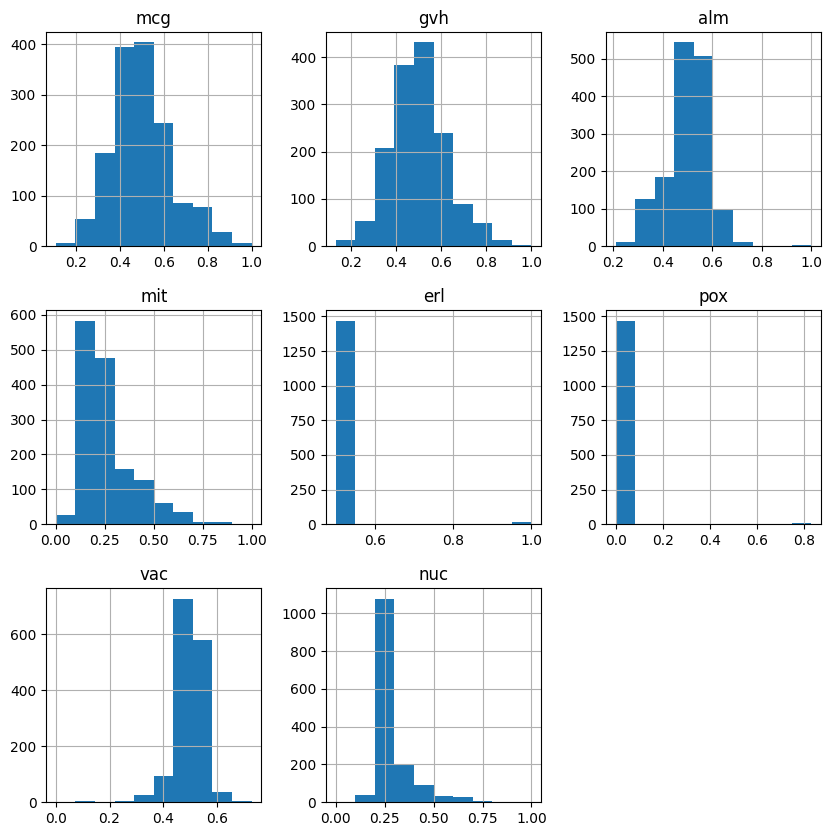

In [ ]:
import matplotlib.pyplot as plt
Df_Yeast.hist(figsize=(10, 10))
plt.show()

In [ ]:
display(Df_Yeast)

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


### 2.2.2 Penjelasan Fitur

In [ ]:
# Ringkasan informasi Fitur
Df_Yeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
dtypes: float64(8)
memory usage: 92.9 KB


dari code diatas dapat diketahui jumlah baris, kolom dan juga type data. dijelaskan sebagai berikut ini :

In [ ]:
Df_Yeast.shape

(1484, 8)

Dapat dilihat bahwa dataset memiliki jumlah baris 1484 dan memiliki 8 kolom yang terdiri dari :

In [ ]:
Df_Yeast.columns

Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'], dtype='object')

- Mcg merupakan Metode McGeoch untuk pengenalan urutan sinyal.

- Gvh merupakan Metode von Heijne untuk pengenalan urutan sinyal.

- Alm merupakan Skor program prediksi wilayah rentang membran ALOM.

- Mit merupakan Skor analisis diskriminan kandungan asam amino daerah terminal-N (20 residu panjang) protein mitokondria dan non-mitokondria.

- Erl merupakan Kehadiran substring HDEL (dianggap bertindak sebagai sinyal untuk retensi dalam lumen retikulum endoplasma).

- Pox merupakan Sinyal penargetan peroksisomal di C-terminus.

- Vac merupakan Skor analisis diskriminan kandungan asam amino vakuolar dan protein ekstraseluler.

- Nuc merupakan Skor analisis diskriminan sinyal lokalisasi nuklir protein nuklir dan non-nuklir.

In [ ]:
Df_Yeast.dtypes

mcg    float64
gvh    float64
alm    float64
mit    float64
erl    float64
pox    float64
vac    float64
nuc    float64
dtype: object

Dari code diatas diketahui tipe data dari masing masing fitur pada dataset sebagai berikut :

- mcg memiliki tipe data numerik 

- gvh  memiliki tipe data numerik 

- alm  memiliki tipe data numerik 

- mit  memiliki tipe data numerik 

- erl  memiliki tipe data numerik 

- pox memiliki tipe data numerik 

- vac memiliki tipe data numerik 

- nuc memiliki tipe data numerik.

### 2.2.3 Penjelasan Klasifikasi

In [ ]:
# Data class
Dft_Yeast = yeast.data.targets

# menghitung jumlah data class
value_count = Dft_Yeast.value_counts()

print(value_count)
print("Jumlah data class:", value_count.sum())

localization_site
CYT                  463
NUC                  429
MIT                  244
ME3                  163
ME2                   51
ME1                   44
EXC                   35
VAC                   30
POX                   20
ERL                    5
Name: count, dtype: int64
Jumlah data class: 1484


localization site dari CYT berjumlah 463, dari NUC berjumlah 429, dari MIT berjumlah 244 dlsbnya. total dari localization_site berjumlah 1484 data

### 2.2 Penggabungan Data 

menggabungkan fitur dengan class sebelum melakukan processing Data, dikarenakan data sebelumnya antara fitur dengan class dipisah

In [ ]:
Df_Yeast = Df_Yeast.join(Dft_Yeast)
print(Df_Yeast)

       mcg   gvh   alm   mit  erl  pox   vac   nuc localization_site
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22               MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22               MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22               MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22               NUC
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22               MIT
...    ...   ...   ...   ...  ...  ...   ...   ...               ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22               ME2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47               NUC
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22               ME2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39               NUC
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22               CYT

[1484 rows x 9 columns]


## 3. Preprocessing (Pemrosesan awal data)

## 3.1 Kualitas data

### 3.1.1 Pengecekkan Missing Value

Missing value atau nilai yang hilang adalah kondisi di mana terdapat data yang tidak lengkap atau tidak tersedia dalam sebuah data.

In [ ]:
# Pengecekkan Missing value
missing_value= Df_Yeast.isnull().sum()

print("Jumlah missing pada data:", missing_value.sum())

Jumlah missing pada data: 0


Tidak ditemukan missing value setelah dilakukan pengecekkan dataset.

### 3.1.2 Pengecekkan Outlier

Outlier adalah nilai yang berbeda secara signifikan dari rentang data yang mengindikasikan kesalahan data. Outlier dapat mempengaruhi analisis statistik dalam machine learning karena dapat menyebabkan ketidakakuratan dalam membangun model. pada pengecekkan outlier menggunakan Z-score untuk mengukur seberapa jauh suatu data dari rata-rata dalam satuan standar deviasi. Data dengan Z-Score yang sangat tinggi atau rendah (biasanya di atas 3 atau di bawah -3) dianggap sebagai outlier.

In [ ]:
import numpy as np

def find_outlier(data):
    # Menghitung Z-Score
    Z_Score = (data - data.mean()) / data.std()
    outliers_zscore = Z_Score[np.abs(Z_Score) > 3].index
    return outliers_zscore

# mengcopy dataset
df_clean = Df_Yeast.copy(deep=True)
# Menyimpan Outlier
outlier_list = []

for column in df_clean.select_dtypes(include=['int64', 'float64']).columns:
    outliers = find_outlier(df_clean[column])
    num_outliers = len(outliers)
    outlier_list.extend(outliers)
     
    print('-----------------------')
    print(f"Outlier(s) dalam kolom '{column}':")
    print(outliers)
    print(f"Total outlier dalam kolom '{column}': {num_outliers}")
print('Total keseluruhan outlier:', len(outlier_list))

-----------------------
Outlier(s) dalam kolom 'mcg':
Index([292, 514, 796, 797, 1356, 1432], dtype='int64')
Total outlier dalam kolom 'mcg': 6
-----------------------
Outlier(s) dalam kolom 'gvh':
Index([29, 326, 506, 745, 1039, 1423], dtype='int64')
Total outlier dalam kolom 'gvh': 6
-----------------------
Outlier(s) dalam kolom 'alm':
Index([85, 988, 989, 990, 1119, 1120, 1183, 1184], dtype='int64')
Total outlier dalam kolom 'alm': 8
-----------------------
Outlier(s) dalam kolom 'mit':
Index([  31,  209,  271,  333,  433,  458,  470,  501,  598,  648,  732,  786,
        988,  989,  990, 1090, 1397, 1454, 1462],
      dtype='int64')
Total outlier dalam kolom 'mit': 19
-----------------------
Outlier(s) dalam kolom 'erl':
Index([219, 304, 306, 395, 488, 500, 506, 659, 707, 739, 764, 841, 1058, 1077], dtype='int64')
Total outlier dalam kolom 'erl': 14
-----------------------
Outlier(s) dalam kolom 'pox':
Index([5, 84, 110, 175, 229, 250, 319, 558, 592, 609, 720, 759, 1145, 1388,
   

hasil dari pengecekkan outlier menunjukkan data memiliki outlier. pada kolom 'Mcg' memiliki total outlier sebanyak 6 hingga kolom 'Nuc' memiliki total outlier sebanyak 41. total keseluruhan dari semua outlier pada kolom data sebanyak 136 outlier

In [ ]:
# Menghapus duplikasi dalam daftar indeks outlier
outlier_clean = list(set(outlier_list))

# Menghapus outlier dari Data
df_cleaned = df_clean.drop(index=outlier_clean)

# Data setelah penghapusan outlier
data_after_clean = df_cleaned.shape[0]

# Jumlah data sebelum dan sesudah penghapusan outlier
print("jumlah outlier yang akan dihapus : ", len(outlier_list))
print("Jumlah data setelah penghapusan outlier:", data_after_clean)

jumlah outlier yang akan dihapus :  136
Jumlah data setelah penghapusan outlier: 1358


jumlah data sekara setelah penghapus outlier adalah 1358. data ini telah bersih dari outlier sehingga dapat dilanjutkan ke tahap berikutnya. 

# 4. Permodelan

Permodelan merupakan proses membangun dan melatih model komputer yang dapat mempelajari pola dari data dan digunakan untuk melakukan tugas tertentu, seperti klasifikasi, prediksi, atau pengenalan pola.

## 4.1 Permodelan dengan menggunakan KNN

KNN merupakan  algoritma berbasis instance yang berarti ia membuat prediksi berdasarkan kemiripan (similarity) antara instance baru dengan instance yang ada dalam dataset pelatihan.

Langkah-langkah KNN :

- Memilih K: Tentukan nilai K (jumlah tetangga terdekat).

- Menghitung Jarak: Hitung jarak antara instance baru dan semua instance dalam data pelatihan.

- Menentukan K Tetangga Terdekat: Pilih K instance dalam data pelatihan yang memiliki jarak terpendek ke instance baru.

- Membuat Prediksi berdasarkan kelas K tetangga terdekat.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# memisahkan fitur dan target
X = df_cleaned.drop('localization_site', axis=1)
y = df_cleaned['localization_site']

# membagi dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inisialisasi model KNN dengan K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi
print("Akurasi model KNN:", round(accuracy_score(y_test, y_pred) * 100 ,1), "%")
print('Classification Report : \n', classification_report(y_test, y_pred))

Akurasi model KNN: 54.0 %
Classification Report : 
               precision    recall  f1-score   support

         CYT       0.45      0.67      0.54        72
         EXC       0.38      0.50      0.43        10
         ME1       0.60      0.55      0.57        11
         ME2       0.29      0.20      0.24        10
         ME3       0.85      0.70      0.77        40
         MIT       0.65      0.47      0.54        47
         NUC       0.52      0.50      0.51        72
         POX       0.00      0.00      0.00         1
         VAC       0.00      0.00      0.00         9

    accuracy                           0.54       272
   macro avg       0.42      0.40      0.40       272
weighted avg       0.54      0.54      0.53       272

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Akurasi model dengan menggunakan KNN mendapatkan Hasil sebesar 54%

## 4.2 Permodelan dengan menggunakan Naive Bayes

Naive Bayes adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi. Algoritma ini didasarkan pada Teorema Bayes, yang menghitung probabilitas suatu kejadian berdasarkan pengetahuan sebelumnya tentang kondisi yang terkait dengan kejadian tersebut

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# memisahkan fitur dan target
x = df_cleaned.drop('localization_site', axis=1)
y = df_cleaned['localization_site']

# membagi dataset menjadi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# membuat model gaussian
model = GaussianNB()

# melatih model dengan data train
model = model.fit(x_train, y_train)

# prediksi pada data uji
y_pred = model.predict(x_test)

# evaluasi model
print("Akurasi model KNN:", round(accuracy_score(y_test, y_pred) * 100 ,1), "%")
print('Classification Report : \n', classification_report(y_test, y_pred))

Akurasi model KNN: 59.9 %
Classification Report : 
               precision    recall  f1-score   support

         CYT       0.50      0.71      0.58        72
         EXC       0.50      0.70      0.58        10
         ME1       0.67      0.55      0.60        11
         ME2       0.33      0.40      0.36        10
         ME3       0.88      0.90      0.89        40
         MIT       0.65      0.60      0.62        47
         NUC       0.62      0.43      0.51        72
         POX       0.00      0.00      0.00         1
         VAC       0.00      0.00      0.00         9

    accuracy                           0.60       272
   macro avg       0.46      0.48      0.46       272
weighted avg       0.59      0.60      0.59       272

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Akurasi model dengan menggunakan Naive Bayes mendapatkan Hasil sebesar 59%

## 4.3 Prediksi Data

Prediksi data dari model yang dibuat menggunakan Naive Bayes dikarenakan akurasinya lebih tinggi yaitu sebesar 59%.

In [ ]:
print(model.predict([[0.43,0.39,0.54,0.21,0.5,0.0,0.53,0.27]]))

['CYT']
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# 5. Evaluasi

Dari model yang telah dibuat yaitu KNN dan Naive Bayes memiliki akurasi yang berbeda dengan jumlah data, pada KNN memiliki akurasi data sebesar 54% sedangkan pada Naive Bayes memiliki akurasi data sebesar 59%.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5f69297-7ac5-40b5-90cb-ea1945d4bb7e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>